In [1]:

import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
#pip install scikit-learn

In [2]:
#raw = fetch_california_housing(download_if_missing=True)
raw = fetch_california_housing()
X = pd.DataFrame(data=raw['data'], columns=raw['feature_names'])
print(X.head())
y = pd.Series(raw['target'])

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


Preprocess the data:

Normalize the features using the mean and standard deviation.
Split the dataset into training and testing sets (e.g., 80% for training, 20% for testing).

In [3]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
print(X_normalized[:5,:])

[[ 2.34476576  0.98214266  0.62855945 -0.15375759 -0.9744286  -0.04959654
   1.05254828 -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 -0.26333577  0.86143887 -0.09251223
   1.04318455 -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 -0.04901636 -0.82077735 -0.02584253
   1.03850269 -1.33282653]
 [ 0.93296751  1.85618152  0.15696608 -0.04983292 -0.76602806 -0.0503293
   1.03850269 -1.33781784]
 [-0.012881    1.85618152  0.3447108  -0.03290586 -0.75984669 -0.08561576
   1.03850269 -1.33781784]]


Define the TensorFlow graph:

Create placeholders for the input features (X) and target variable (y).
Create variables for the model's weights (W) and bias (b).
Define the linear regression model using the equation: y_pred = X * W + b.
Define the loss function as the mean squared error between the predicted values and the true values.
Choose an optimizer (e.g., Gradient Descent) to minimize the loss function.

In [4]:
tf.compat.v1.disable_eager_execution()
X_placeholder = tf.compat.v1.placeholder(tf.float32, shape=[None, X_train.shape[1]])
y_placeholder = tf.compat.v1.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.compat.v1.random_normal([X_train.shape[1], 1]))
b = tf.Variable(tf.compat.v1.random_normal([1]))

y_pred = tf.matmul(X_placeholder, W) + b

loss = tf.reduce_mean(tf.square(y_pred - y_placeholder))

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(loss)

# Define the TensorFlow graph
graph = tf.Graph()

with graph.as_default():
    # Create placeholders for input features (X) and target variable (y)
    X_placeholder =   tf.compat.v1.placeholder(tf.float32, shape=(None, X_train.shape[1]), name='X_placeholder')
    y_placeholder = tf.compat.v1.placeholder(tf.float32, shape=(None,), name='y_placeholder')

    # Create variables for model's weights (W) and bias (b)
    W = tf.Variable(tf.random.normal((X_train.shape[1],)), name='weights')
    b = tf.Variable(0.0, name='bias')

    # Define linear regression model
    y_pred = tf.matmul(X_placeholder, tf.reshape(W, (-1, 1))) + b

    # Define loss function as mean squared error
    loss = tf.reduce_mean(tf.square(y_placeholder - y_pred))

    # Choose optimizer (e.g., Gradient Descent)
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
    training_op = optimizer.minimize(loss)


Train the model:

Initialize TensorFlow session.
Initialize the model's variables.
Set the number of training epochs and the learning rate.
For each epoch, iterate through the training dataset and update the model's parameters using the optimizer.
Print the training loss at regular intervals.

# Train the model
num_epochs = 1000
learning_rate = 0.01

with tf.compat.v1.Session() as sess:
    # Initialize variables
    sess.run(tf.compat.v1.global_variables_initializer())

    # Training loop
    for epoch in range(num_epochs):
        # Iterate through the training dataset in mini-batches
        for batch_X, batch_y in zip(X_train, y_train):
            # Run the optimizer to update the model's parameters
            sess.run(train_op, feed_dict={X_placeholder: batch_X, y_placeholder: batch_y})

        # Print training loss at regular intervals
        if epoch % 100 == 0:
            train_loss = sess.run(loss, feed_dict={X_placeholder: X_train, y_placeholder: y_train})
            print("Epoch {}, Training Loss: {:.4f}".format(epoch, train_loss))


In [5]:
batch_size = 128
num_epochs = 20

with tf.compat.v1.Session() as tfsession:
    tfsession.run(tf.compat.v1.global_variables_initializer())

    for epoch in range(num_epochs):
        for i in range(0, X_train.shape[0], batch_size):
            batch_X = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]
            tfsession.run(train_op, feed_dict={X_placeholder: batch_X, y_placeholder: batch_y})

        train_loss = tfsession.run(loss, feed_dict={X_placeholder: X_train, y_placeholder: y_train})
        print(f"Epoch {epoch}: Training Loss = {train_loss}")


    test_loss = tfsession.run(loss, feed_dict={X_placeholder: X_test, y_placeholder: y_test})
    print(f"Test Loss: {test_loss}")

    y_pred_test = tfsession.run(y_pred, feed_dict={X_placeholder: X_test})

Epoch 0: Training Loss = 1.7004367113113403
Epoch 1: Training Loss = 1.4143565893173218
Epoch 2: Training Loss = 1.3734163045883179
Epoch 3: Training Loss = 1.359619140625
Epoch 4: Training Loss = 1.3519335985183716
Epoch 5: Training Loss = 1.3469148874282837
Epoch 6: Training Loss = 1.3435801267623901
Epoch 7: Training Loss = 1.341346025466919
Epoch 8: Training Loss = 1.3398507833480835
Epoch 9: Training Loss = 1.3388497829437256
Epoch 10: Training Loss = 1.3381801843643188
Epoch 11: Training Loss = 1.3377325534820557
Epoch 12: Training Loss = 1.3374334573745728
Epoch 13: Training Loss = 1.3372340202331543
Epoch 14: Training Loss = 1.3371013402938843
Epoch 15: Training Loss = 1.3370132446289062
Epoch 16: Training Loss = 1.3369548320770264
Epoch 17: Training Loss = 1.3369163274765015
Epoch 18: Training Loss = 1.3368911743164062
Epoch 19: Training Loss = 1.3368746042251587
Test Loss: 1.3107521533966064


Evaluate the model:

Use the trained model to make predictions on the test dataset.
Calculate the mean squared error (MSE) between the predicted and true values.
Print the MSE as a measure of the model's performance.

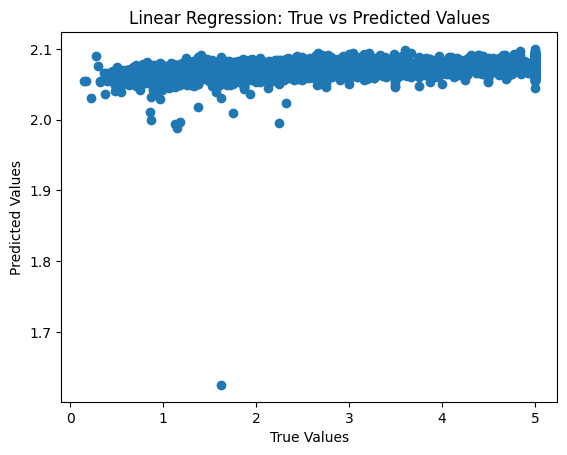

In [6]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: True vs Predicted Values")
plt.show()